In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
df=pd.read_csv("./Datos/Index2018.csv")

In [8]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [10]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [11]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

* Tendencia
* Estacionaridad
* Ciclico
* Irregularidad

<AxesSubplot:>

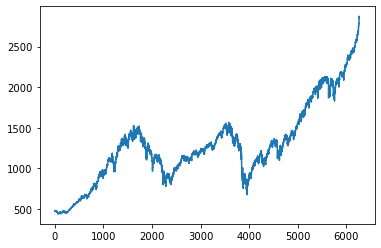

In [12]:
df.spx.plot()

<AxesSubplot:>

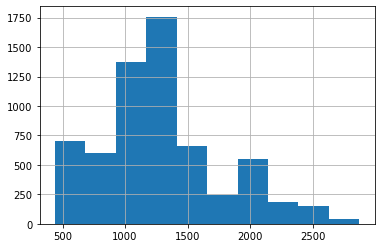

In [13]:
df.spx.hist()

In [15]:
import statsmodels.api as sm

In [17]:
ciclo,tendencia=sm.tsa.filters.hpfilter(df["spx"])

In [19]:
df["Tendencia_spx"]=tendencia

<AxesSubplot:>

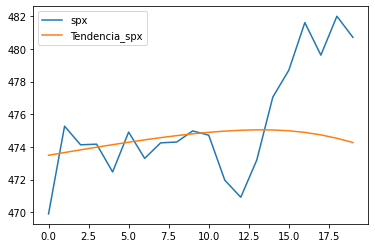

In [22]:
df[["spx","Tendencia_spx"]][:20].plot()

In [23]:
df["Medias_Moviles"]=df["spx"].rolling(5).mean()

<AxesSubplot:>

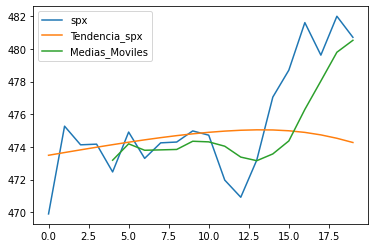

In [26]:
df[["spx","Tendencia_spx","Medias_Moviles"]][:20].plot()

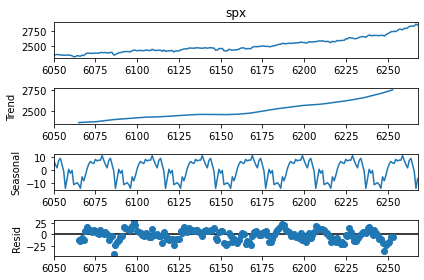

In [33]:
sm.tsa.seasonal_decompose(df[6050:]["spx"],model="additive",period=30).plot();

In [36]:
df.tail(30)

,date,spx,dax,ftse,nikkei,Tendencia_spx,Medias_Moviles
6239,18/12/2017,2690.158251,13312.30,7537.008105,22901.77,2668.034440,2668.985919
6240,19/12/2017,2681.473629,13215.79,7544.086572,22868.00,2671.901348,2672.459499
6241,20/12/2017,2679.248085,13069.17,7525.217814,22891.72,2675.853614,2675.740078
6242,21/12/2017,2684.569176,13109.74,7603.980440,22866.10,2679.927267,2682.251424
6243,22/12/2017,2683.337274,13072.79,7592.663253,22902.76,2684.160460,2683.757283
6244,25/12/2017,2683.337274,13072.79,7592.663253,22939.18,2688.594244,2682.393088
6245,26/12/2017,2680.504486,13072.79,7592.663253,22892.69,2693.269158,2682.199259
6246,27/12/2017,2682.619923,13070.02,7620.681649,22911.21,2698.222454,2682.873627
6247,28/12/2017,2687.537829,12979.94,7622.877814,22783.98,2703.483406,2683.467357
6248,29/12/2017,2673.610523,12917.64,7687.772698,22764.94,2709.071539,2681.522007


In [37]:
import scipy.stats 

((array([-3.16708859e+00, -2.89951764e+00, -2.75004575e+00, -2.64454777e+00,
         -2.56219343e+00, -2.49424163e+00, -2.43616334e+00, -2.38529779e+00,
         -2.33994417e+00, -2.29894709e+00, -2.26148460e+00, -2.22695043e+00,
         -2.19488416e+00, -2.16492761e+00, -2.13679645e+00, -2.11026110e+00,
         -2.08513340e+00, -2.06125714e+00, -2.03850119e+00, -2.01675433e+00,
         -1.99592140e+00, -1.97592034e+00, -1.95667984e+00, -1.93813755e+00,
         -1.92023863e+00, -1.90293455e+00, -1.88618220e+00, -1.86994304e+00,
         -1.85418254e+00, -1.83886958e+00, -1.82397605e+00, -1.80947646e+00,
         -1.79534760e+00, -1.78156831e+00, -1.76811920e+00, -1.75498251e+00,
         -1.74214188e+00, -1.72958224e+00, -1.71728964e+00, -1.70525120e+00,
         -1.69345493e+00, -1.68188972e+00, -1.67054518e+00, -1.65941165e+00,
         -1.64848010e+00, -1.63774206e+00, -1.62718961e+00, -1.61681530e+00,
         -1.60661214e+00, -1.59657355e+00, -1.58669332e+00, -1.57696560e+00,

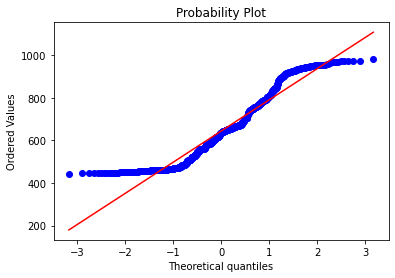

In [40]:
scipy.stats.probplot(df.spx[100:1000],plot=plt);